### 01. 라이브러리 임포트

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

### 02. 데이터 불러오기 (xlsx)

In [105]:
df = pd.read_excel('wpdb.xlsx')
df.head()

,UID,CenterId,StudentName,SchoolName,SchoolGrade,SchoolLevel,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,00249736-53A0-4D68-8CB9-DFA306A33435,15,임현승,성동중학교,1학년,high,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,00515C99-00A6-444B-93A3-73D7BB0852E5,15,노해율,내성중학교,3학년,middle,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,00600FC7-C7DE-40DE-AD7D-A1D94DD5D212,16,신아인,경일중학교,3학년,middle,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,0063DEBD-095C-4804-A246-7EDD5160419A,14,손태윤,브니엘예술중학교,3학년,middle,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,007378EC-9A44-4A75-8B1A-70D13FBE7832,16,오주안,오션중학교,3학년,middle,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


### 03. 학습에 사용될 데이터와 예측 데이터 설정
- 학습 데이터 X
- 예측 데이터 y
    - 0과 1의 값만 존재하며, 분류를 이용하여 예측 예정

In [106]:
X=df[df.columns[6:]]
X.head()

,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


In [107]:
X = X.drop(columns = ['Address','Address2', 'max_sche_date', 'StudentStatus'])
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,17,5,0,3,0,0,1,41,0
1,16,5,0,19,0,0,0,52,0
2,16,8,0,0,0,0,0,0,1
3,16,2,0,0,0,0,0,6,0
4,16,29,0,23,0,0,1,278,1
...,...,...,...,...,...,...,...,...,...
2492,15,2,1,20,0,0,0,64,1
2493,16,9,0,0,0,0,0,0,1
2494,16,3,1,9,0,0,0,23,0
2495,17,6,0,0,0,0,0,0,1


### 04. 나이 데이터 0, 1, 2로 변환

In [108]:
X['StudentGrade'].replace({15: 0, 16: 1, 17:2}, inplace=True)

In [109]:
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,2,5,0,3,0,0,1,41,0
1,1,5,0,19,0,0,0,52,0
2,1,8,0,0,0,0,0,0,1
3,1,2,0,0,0,0,0,6,0
4,1,29,0,23,0,0,1,278,1
...,...,...,...,...,...,...,...,...,...
2492,0,2,1,20,0,0,0,64,1
2493,1,9,0,0,0,0,0,0,1
2494,1,3,1,9,0,0,0,23,0
2495,2,6,0,0,0,0,0,0,1


In [110]:
pd.DataFrame(X).describe()

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,1.080497,10.095715,0.236684,8.060473,0.010813,0.028835,2.785342,64.474169,0.567080
std,0.822076,10.497140,0.648321,9.690521,0.130807,0.447538,5.310735,80.639647,0.495579
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,6.000000,0.000000,4.000000,0.000000,0.000000,0.000000,31.000000,1.000000
75%,2.000000,14.000000,0.000000,13.000000,0.000000,0.000000,3.000000,95.000000,1.000000
max,2.000000,62.000000,19.000000,64.000000,2.000000,11.000000,54.000000,396.000000,1.000000


In [111]:
print(X.shape)
type(X)

(2497, 9)


pandas.core.frame.DataFrame

In [112]:
# 정답(레이블) 설정
y = X['target']
y # 0과 1로 구분, 1:재원 / 0:퇴원

0       0
1       0
2       1
3       0
4       1
       ..
2492    1
2493    1
2494    0
2495    1
2496    0
Name: target, Length: 2497, dtype: int64

In [113]:
print(y.shape)

(2497,)


In [114]:
X = X.drop(columns = ['target'])

In [115]:
X

,StudentGrade,cs_count,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count
0,2,5,0,3,0,0,1,41
1,1,5,0,19,0,0,0,52
2,1,8,0,0,0,0,0,0
3,1,2,0,0,0,0,0,6
4,1,29,0,23,0,0,1,278
...,...,...,...,...,...,...,...,...
2492,0,2,1,20,0,0,0,64
2493,1,9,0,0,0,0,0,0
2494,1,3,1,9,0,0,0,23
2495,2,6,0,0,0,0,0,0


### 05. 결측치 확인

In [116]:
X.isnull().sum()

StudentGrade          0
cs_count              0
withdraw_csl_count    0
remain_csl_count      0
supply_count          0
clinic_count          0
abs_count             0
pre_count             0
dtype: int64

### 06. 데이터 정규화

In [117]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

In [118]:
scaler_minmax.fit(X)
X_scaled_minmax_train=scaler_minmax.transform(X)
pd.DataFrame(X_scaled_minmax_train).describe()

# 최소값(min)은 0으로, 최대값(max)은 1로 나타난 걸 확인할 수 있음

,0,1,2,3,4,5,6,7
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,0.540248,0.149110,0.012457,0.125945,0.005406,0.002621,0.051580,0.162814
std,0.411038,0.172084,0.034122,0.151414,0.065404,0.040685,0.098347,0.203635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016393,0.000000,0.015625,0.000000,0.000000,0.000000,0.010101
50%,0.500000,0.081967,0.000000,0.062500,0.000000,0.000000,0.000000,0.078283
75%,1.000000,0.213115,0.000000,0.203125,0.000000,0.000000,0.055556,0.239899
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 07. 학습 데이터와 검증용 데이터 분리
- Train/Test set 분리
- Train/Validation/Test set 분리

In [119]:
# Train/Test set 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 0) 

# stratify : 훈련 데이터와 테스트 데이터를 구분할 때, 레이블의 범주비율에 맞게 하라는 것 (회귀에는 사용 X)

In [120]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1997, 8), (500, 8), (1997,), (500,))

### 08. KNeighborsClassifier 모델 생성

In [121]:
classifier = KNeighborsClassifier(n_neighbors = 30)    # k 개수 지정

In [122]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

### 09. 모델 정확도 측정 및 k별 시각화

In [123]:
print("Test set predictions: {}".format(classifier.predict(X_test)))

Test set predictions: [1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0
 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1
 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0
 1 

In [124]:
classifier.score(X_test, y_test)  # score()메서드 내부적으로 predict()를 사용한다고 함

0.778

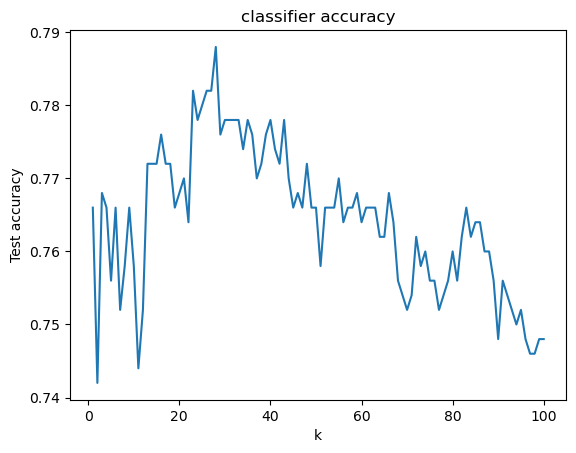

In [126]:
import matplotlib.pyplot as plot
from sklearn.neighbors import KNeighborsClassifier

k_list1 = range(1,101)
accuracy = []

for k in k_list1:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    accuracy.append(classifier.score(X_test, y_test))

    
from importlib import reload           # matplotlib xlabel, ylabel 오류 해결 코드!
plt=reload(plt)    
    
plt.plot(k_list1, accuracy)
plt.xlabel("k")
plt.ylabel("Test accuracy")
plt.title('classifier accuracy')
plt.show()

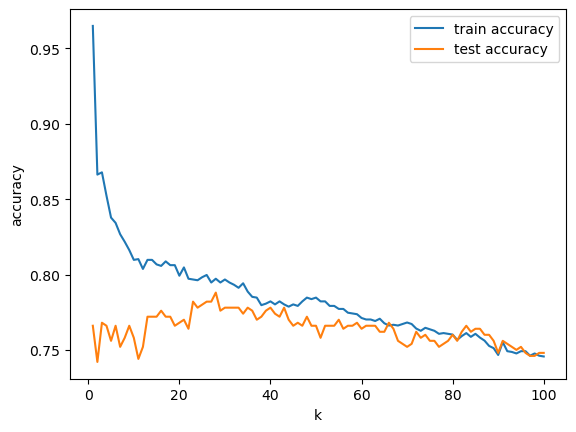

In [129]:
k_list2 = range(1,101)
train_accuracy = []
test_accuracy = []

for k in k_list2 :
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    train_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(k_list2, train_accuracy, label="train accuracy")
plt.plot(k_list2, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("k")
plt.legend()

### 10. 분류 모델의 성능 평가 지표 (컨퓨전 매트릭스)

In [130]:
y_pred = classifier.predict(X_test)

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[153,  63],
       [ 63, 221]], dtype=int64)

In [132]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN) 수동 정확도 계산
cm = confusion_matrix(y_test, y_pred)
(153+221) / cm.sum()

0.748

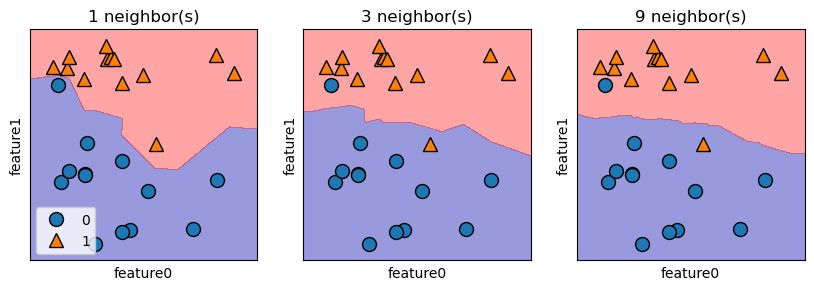

In [133]:
import mglearn

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature0")
    ax.set_ylabel("feature1")
axes[0].legend(loc=3)
plt.show()

### 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있다.
- 이웃의 수를 늘릴수록 결정 경계는 더 부드러워진다.
- 부드러운 경계는 더 단순한 모델을 의미
- 이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아진다.